In [92]:
#pip install osmnx

In [94]:
import osmnx as ox
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
# G = ox.graph_from_point(center, dist = KM, dist_type = 'bbox', network_type = 'drive', simplify = True, retain_all = False)
# nodes, edges = ox.graph_to_gdfs(G)
# fig, ax = ox.plot_graph(G, show=False, close=False)

# fig, ax = plt.subplots(figsize = (12,8))

# nodes.plot(ax = ax, markersize = 5)
# edges.plot(ax = ax)
# plt.scatter(32.85817266343174, -117.20262121216017, color='red')

# # Show the plot
# plt.show()

In [95]:
# route = nx.shortest_path(G, sdge, charger, weight='length')

# # Plot the graph with the route
# fig, ax = ox.plot_graph_route(G, route, route_linewidth=3, node_size=0)

In [96]:
ox.config(use_cache=False)

# Define the location for San Diego
place_name = "San Diego, California, USA"

# Download the street network for San Diego
graph = ox.graph_from_place(place_name, network_type='drive')

/var/folders/vx/n_j7yq3105g00_y8dx2xf70h0000gn/T/ipykernel_5503/1606263077.py:1: FutureWarning: The `utils.config` function is deprecated and will be removed in the v2.0.0 release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  ox.config(use_cache=False)


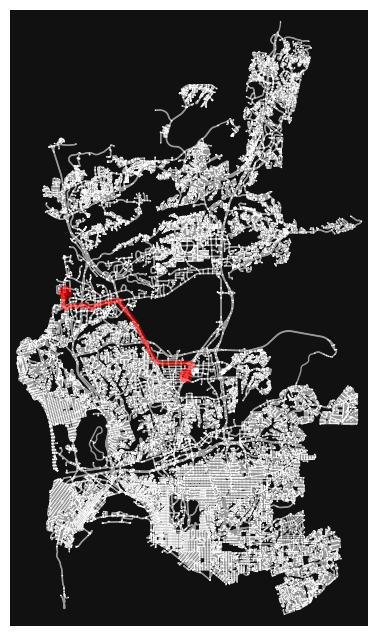

In [97]:
# Define the start and end coordinates
sdge = (32.8242841, -117.1455205)
charger = (32.88075714315878, -117.2419615625954)

# Get the nearest nodes in the graph to the start and end points
start_node = ox.distance.nearest_nodes(graph, sdge[1], sdge[0])
end_node = ox.distance.nearest_nodes(graph, charger[1], charger[0])

# Calculate the shortest path
shortest_route = ox.shortest_path(graph, start_node, end_node, weight='length')

# Plot the shortest route
fig, ax = ox.plot_graph_route(graph, shortest_route, node_size = 1, route_linewidth=4)


In [98]:
#Length of the route
edge_lengths = ox.utils_graph.get_route_edge_attributes(graph, shortest_route, 'length')
print('Distance from SDGE to charger in meters:', round(sum(edge_lengths)))

Distance from SDGE to charger in meters: 14940


/var/folders/vx/n_j7yq3105g00_y8dx2xf70h0000gn/T/ipykernel_5503/3965541467.py:2: FutureWarning: The `get_route_edge_attributes` function has been deprecated and will be removed in the v2.0.0 release. Use the `routing.route_to_gdf` function instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  edge_lengths = ox.utils_graph.get_route_edge_attributes(graph, shortest_route, 'length')


In [103]:
#Interactive route map

#use networkx to calculate the shortest path between 2 nodes
origin_node = start_node #list(graph.nodes())[0]
destination_node = end_node #list(graph.nodes())[-1]
route = nx.shortest_path(graph, origin_node, destination_node)

#plot the route with folium
ox.plot_route_folium(graph, route, weight = 6)

/var/folders/vx/n_j7yq3105g00_y8dx2xf70h0000gn/T/ipykernel_5503/4140096980.py:9: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  ox.plot_route_folium(graph, route, weight = 6)
